In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('heart.csv')

# Separating Features and target variables
X = data.drop('target', axis=1)
y = data['target']

In [5]:
# Notes on the datasets
# target column, is the heart disease status, where, 0 = no heart disease, 1
# presence of heart disease

In [8]:
# Feature Engineering
# Select the top 10 features based on the chi-squared test

from sklearn.feature_selection import SelectKBest, chi2 

X = data.drop('target', axis=1)
y = data['target']

selector = SelectKBest(chi2, k=10)
x_new = selector.fit_transform(X,y)
selected_features = X.columns[selector.get_support()]

print('Selected Features: ', selected_features)


Selected Features:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [9]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Assume X and y are your feature and target arrays

model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print('Cross Validation Accuracy: ', scores.mean())  # Call the mean method

Cross Validation Accuracy:  0.8151366120218579


In [14]:
# Training and Evaluating the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = model.predict(X_test)

print('Test Score Accuracy: ', accuracy_score(y_test, y_pred))

Test Score Accuracy:  0.8524590163934426


Logistic Regression Accuracy: 0.8852459016393442
Logistic Regression Precision: 0.8787878787878788
Logistic Regression Recall: 0.90625
Logistic Regression F1 Score: 0.8923076923076924
Logistic Regression ROC AUC: 0.9267241379310345


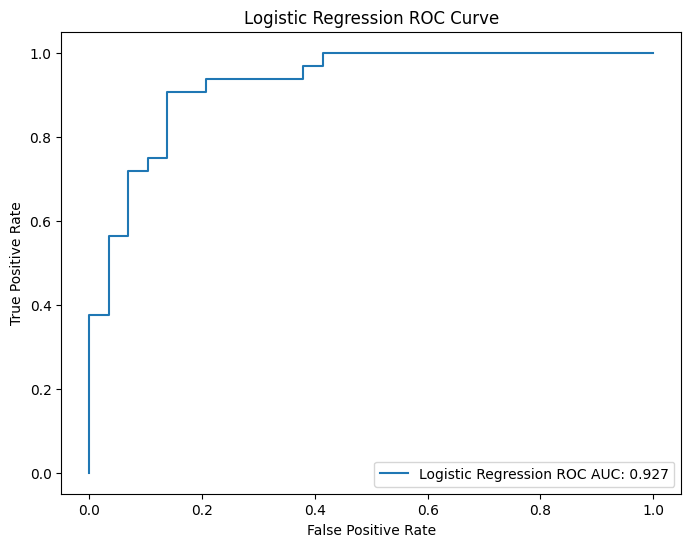

Metrics for Logistic Regression:
Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076924
ROC AUC: 0.9267241379310345

K-Nearest Neighbors Accuracy: 0.6885245901639344
K-Nearest Neighbors Precision: 0.6857142857142857
K-Nearest Neighbors Recall: 0.75
K-Nearest Neighbors F1 Score: 0.7164179104477612
K-Nearest Neighbors ROC AUC: 0.7613146551724137


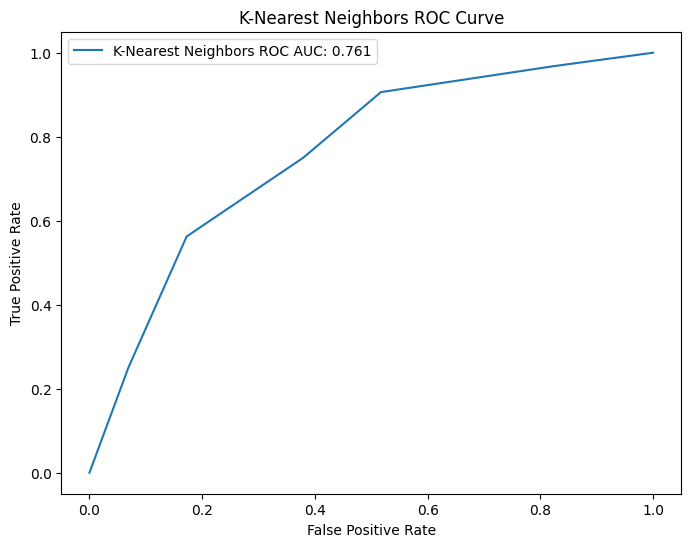

Metrics for K-Nearest Neighbors:
Accuracy: 0.6885245901639344
Precision: 0.6857142857142857
Recall: 0.75
F1 Score: 0.7164179104477612
ROC AUC: 0.7613146551724137

Support Vector Machines Accuracy: 0.7049180327868853
Support Vector Machines Precision: 0.6666666666666666
Support Vector Machines Recall: 0.875
Support Vector Machines F1 Score: 0.7567567567567568
Support Vector Machines ROC AUC: 0.8394396551724139


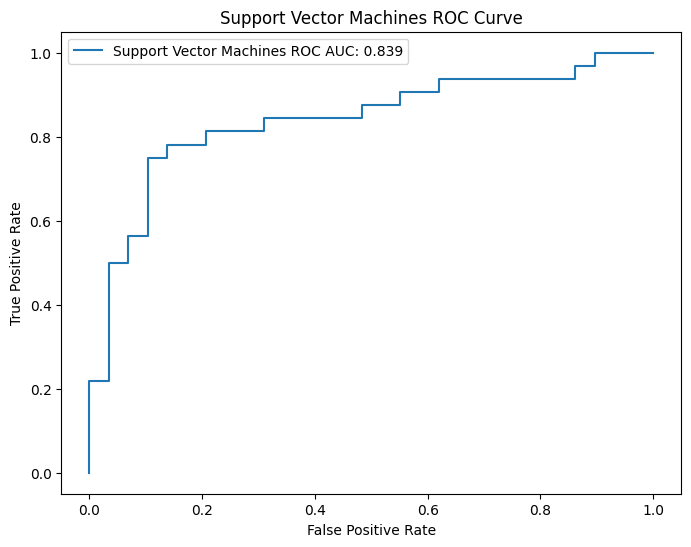

Metrics for Support Vector Machines:
Accuracy: 0.7049180327868853
Precision: 0.6666666666666666
Recall: 0.875
F1 Score: 0.7567567567567568
ROC AUC: 0.8394396551724139

Decision Tree Accuracy: 0.7540983606557377
Decision Tree Precision: 0.84
Decision Tree Recall: 0.65625
Decision Tree F1 Score: 0.7368421052631579
Decision Tree ROC AUC: 0.7591594827586207


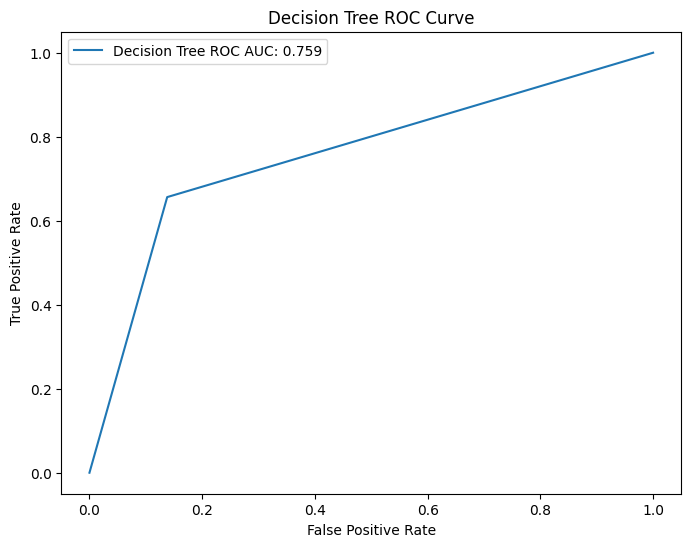

Metrics for Decision Tree:
Accuracy: 0.7540983606557377
Precision: 0.84
Recall: 0.65625
F1 Score: 0.7368421052631579
ROC AUC: 0.7591594827586207

Random Forest Accuracy: 0.8360655737704918
Random Forest Precision: 0.84375
Random Forest Recall: 0.84375
Random Forest F1 Score: 0.84375
Random Forest ROC AUC: 0.9202586206896551


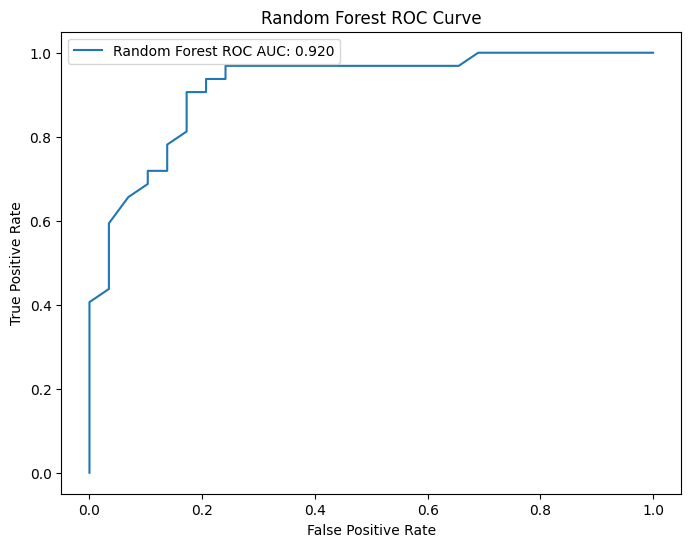

Metrics for Random Forest:
Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1 Score: 0.84375
ROC AUC: 0.9202586206896551



In [19]:
# Classification Accuracy of the Algorithms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize models

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machines": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Evaluate the metrics

metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score,
    "ROC AUC": roc_auc_score
}

# Train and evaluate each model

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Calculate the metrics
    metric_values = {}
    for metrics_name, metric_func in metrics.items():
        if metrics_name == 'ROC AUC':
            metric_value = metric_func(y_test, y_prob)
        else:
            metric_value = metric_func(y_test, y_pred)
        print(f'{model_name} {metrics_name}: {metric_value}')
        metric_values[metrics_name] = metric_value
        
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} ROC AUC: {metric_values["ROC AUC"]:.3f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend()
    plt.show()
    
    # Print metric values
    print(f'Metrics for {model_name}:')
    for metrics_name, metric_value in metric_values.items():
        print(f'{metrics_name}: {metric_value}')
    print()

In [ ]:
# Conclusion Model Performance Comparison
# 1. Logistic Regression is the BEST PERFORMING MODEL

# Performs well with an accuracy of 0.885 and an ROC AUC of 0.927, indicating good ability to distinguish between classes.
# Precision (0.879) is slightly lower than Recall (0.906), suggesting a few false positives.

# Actionable Insights: Consider this model for deployment due to its strong overall performance.



# 2. K-Nearest Neighbors (KNN)

# Lowest performing model with accuracy (0.689) and ROC AUC (0.761) significantly lower than others.

# Actionable Insights: This model likely requires further tuning, such as optimizing the value of K.



# 3.  Support Vector Machines (SVM)

# Shows moderate performance with accuracy (0.705) and ROC AUC (0.839).
# High Recall (0.875) suggests it might be good at capturing positive class examples, but lower Precision (0.667) 
# indicates potential false positives.

# Actionable Insights: SVM could be a contender if high recall is crucial for your task.




# 4. Decision Tree

# Achieves reasonable accuracy (0.754) and ROC AUC (0.759).
# High Precision (0.84) suggests good control over false positives, but lower Recall (0.656) 
# indicates it might miss some true positive cases.

# Actionable Insights: This model could be a good choice if minimizing false positives is a priority.
# Pruning can potentially improve balance between precision and recall.



# 5. Random Forest

# Second-best performer with accuracy (0.836) and strong ROC AUC (0.920).
# Balanced Precision (0.844) and Recall (0.844) suggest good overall performance.

# Actionable Insights: This model is a strong candidate for deployment due to its balanced performance
# and good generalization ability.
# Explore ensemble methods like stacking or gradient boosting that combine the strengths of multiple models 
# (e.g., Logistic Regression and Random Forest) to potentially achieve even better accuracy and robustness.



# Overall Recommendation:

# Based on the current results, Logistic Regression and Random Forest are the frontrunners for deployment. 
# Consider further tuning the hyperparameters of all models, especially KNN and SVM, to see if their performance can be improved.
# Experiment with ensemble methods to potentially achieve even better results.